<a href="https://colab.research.google.com/github/richie-1/Stock-Price/blob/main/StockPriceModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

In [2]:
pip install nsepy

pip install nsepy

## Part 1 : Data Selection

In [5]:
url1 = 'https://raw.githubusercontent.com/richie-1/Stock-Price/main/tcs.csv?token=AQWFQZ2JGKF4KADP7XMYRFS7TLSTU'

In [6]:
tcs = pd.read_csv(url1)

In [7]:
url2 = 'https://raw.githubusercontent.com/richie-1/Stock-Price/main/infy.csv?token=AQWFQZ27WEN7WEE7UUM4ZRK7TLSVY'
infy = pd.read_csv(url2)

In [9]:

url3 = 'https://raw.githubusercontent.com/richie-1/Stock-Price/main/n500.csv?token=AQWFQZ43Y7BDK3CZ66ACP4S7TLSXK'

In [10]:

n500 = pd.read_csv(url3)

In [11]:
# Daily level data TCS
tcs

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,TCS,EQ,2288.10,2266.0,2301.60,2266.00,2296.85,2293.10,2290.60,448704,1.027802e+14,29524,213160,0.4751
491,2016-12-27,TCS,EQ,2293.10,2281.5,2330.00,2281.50,2322.80,2323.40,2317.79,647346,1.500411e+14,42719,358760,0.5542
492,2016-12-28,TCS,EQ,2323.40,2326.7,2349.90,2303.15,2305.25,2313.40,2335.86,675209,1.577194e+14,65267,420288,0.6225
493,2016-12-29,TCS,EQ,2313.40,2303.0,2359.90,2303.00,2355.00,2351.70,2346.25,981758,2.303445e+14,64945,575262,0.5860


In [12]:
# Daily level data Infy
infy

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,INFY,EQ,988.45,988.00,994.00,975.10,983.35,982.75,983.28,1606914,1.580050e+14,47565,958338,0.5964
491,2016-12-27,INFY,EQ,982.75,982.75,1001.90,980.00,996.90,998.95,993.09,2456408,2.439426e+14,57508,1430604,0.5824
492,2016-12-28,INFY,EQ,998.95,1002.95,1009.80,995.00,999.00,998.50,1003.15,2738408,2.747040e+14,81224,1853359,0.6768
493,2016-12-29,INFY,EQ,998.50,1003.75,1008.00,988.15,990.00,992.35,997.88,3120062,3.113452e+14,92963,2303901,0.7384


In [13]:
n500

,Date,Open,High,Low,Close,Volume,Turnover
0,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10
1,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11
2,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11
3,2015-01-06,6817.65,6817.65,6646.40,6656.80,716905569,1.563956e+11
4,2015-01-07,6653.65,6680.50,6605.40,6644.95,723294637,1.507763e+11
...,...,...,...,...,...,...,...
490,2016-12-26,6800.20,6801.80,6720.25,6724.45,499941890,1.182531e+11
491,2016-12-27,6730.90,6840.85,6711.65,6832.00,568808578,1.324917e+11
492,2016-12-28,6849.45,6902.00,6839.90,6847.40,565570193,1.403077e+11
493,2016-12-29,6846.80,6920.90,6839.80,6915.45,864984299,1.800378e+11


### Rolling window analysis of time series

In [14]:
# Define rolling average function
def roll_avg(close, window):
    sma = close.rolling(window=window).mean().shift()
    return sma


In [15]:
window = 1
tcs['SMA'] = roll_avg(tcs['Close'], window)

In [16]:
tcs

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2545.55
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,2579.45
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,2540.25
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,2446.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,TCS,EQ,2288.10,2266.0,2301.60,2266.00,2296.85,2293.10,2290.60,448704,1.027802e+14,29524,213160,0.4751,2288.10
491,2016-12-27,TCS,EQ,2293.10,2281.5,2330.00,2281.50,2322.80,2323.40,2317.79,647346,1.500411e+14,42719,358760,0.5542,2293.10
492,2016-12-28,TCS,EQ,2323.40,2326.7,2349.90,2303.15,2305.25,2313.40,2335.86,675209,1.577194e+14,65267,420288,0.6225,2323.40
493,2016-12-29,TCS,EQ,2313.40,2303.0,2359.90,2303.00,2355.00,2351.70,2346.25,981758,2.303445e+14,64945,575262,0.5860,2313.40


In [17]:
# 4,16,28,40,52
# Convert week to days
window= []
week = [4,16,28,40, 52]

In [18]:
for i in range(5):
    day = week[i]*7
    window.append(day)

In [19]:
window

[28, 112, 196, 280, 364]

In [20]:
for i in range(5):
    tcs[i+16] = roll_avg(tcs['Close'], window[i])

In [21]:
tcs

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA,16,17,18,19,20
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2545.55,NaN,NaN,NaN,NaN,NaN
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,2579.45,NaN,NaN,NaN,NaN,NaN
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,2540.25,NaN,NaN,NaN,NaN,NaN
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,2446.60,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,TCS,EQ,2288.10,2266.0,2301.60,2266.00,2296.85,2293.10,2290.60,448704,1.027802e+14,29524,213160,0.4751,2288.10,2224.225000,2399.833482,2446.231378,2418.161964,2452.208104
491,2016-12-27,TCS,EQ,2293.10,2281.5,2330.00,2281.50,2322.80,2323.40,2317.79,647346,1.500411e+14,42719,358760,0.5542,2293.10,2227.921429,2398.047768,2445.904082,2417.485000,2451.273489
492,2016-12-28,TCS,EQ,2323.40,2326.7,2349.90,2303.15,2305.25,2313.40,2335.86,675209,1.577194e+14,65267,420288,0.6225,2323.40,2234.571429,2396.275446,2445.777041,2416.833750,2450.468956
493,2016-12-29,TCS,EQ,2313.40,2303.0,2359.90,2303.00,2355.00,2351.70,2346.25,981758,2.303445e+14,64945,575262,0.5860,2313.40,2241.296429,2395.097321,2445.512500,2416.269643,2449.695055


In [22]:
tcs.rename(columns= {16:'SMA4',
                     17:'SMA16',
                     18:'SMA28',
                     19:'SMA40',
                     20:'SMA52'}, inplace=True)
tcs.drop(['SMA'], axis=1)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA4,SMA16,SMA28,SMA40,SMA52
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,NaN,NaN,NaN,NaN,NaN
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,NaN,NaN,NaN,NaN,NaN
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,NaN,NaN,NaN,NaN,NaN
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,TCS,EQ,2288.10,2266.0,2301.60,2266.00,2296.85,2293.10,2290.60,448704,1.027802e+14,29524,213160,0.4751,2224.225000,2399.833482,2446.231378,2418.161964,2452.208104
491,2016-12-27,TCS,EQ,2293.10,2281.5,2330.00,2281.50,2322.80,2323.40,2317.79,647346,1.500411e+14,42719,358760,0.5542,2227.921429,2398.047768,2445.904082,2417.485000,2451.273489
492,2016-12-28,TCS,EQ,2323.40,2326.7,2349.90,2303.15,2305.25,2313.40,2335.86,675209,1.577194e+14,65267,420288,0.6225,2234.571429,2396.275446,2445.777041,2416.833750,2450.468956
493,2016-12-29,TCS,EQ,2313.40,2303.0,2359.90,2303.00,2355.00,2351.70,2346.25,981758,2.303445e+14,64945,575262,0.5860,2241.296429,2395.097321,2445.512500,2416.269643,2449.695055


In [23]:
for i in range(5):
    infy[i+16] = roll_avg(infy['Close'], window[i])

In [24]:
infy.rename(columns= {16:'SMA4',
                     17:'SMA16',
                     18:'SMA28',
                     19:'SMA40',
                     20:'SMA52'}, inplace=True)

In [25]:
infy

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA4,SMA16,SMA28,SMA40,SMA52
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,NaN,NaN,NaN,NaN,NaN
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,NaN,NaN,NaN,NaN,NaN
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,NaN,NaN,NaN,NaN,NaN
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,INFY,EQ,988.45,988.00,994.00,975.10,983.35,982.75,983.28,1606914,1.580050e+14,47565,958338,0.5964,969.175000,1023.105357,1098.750255,1099.421607,1098.283242
491,2016-12-27,INFY,EQ,982.75,982.75,1001.90,980.00,996.90,998.95,993.09,2456408,2.439426e+14,57508,1430604,0.5824,970.669643,1021.220982,1097.751531,1098.921071,1098.281731
492,2016-12-28,INFY,EQ,998.95,1002.95,1009.80,995.00,999.00,998.50,1003.15,2738408,2.747040e+14,81224,1853359,0.6768,973.139286,1019.637946,1097.019133,1098.423393,1098.332418
493,2016-12-29,INFY,EQ,998.50,1003.75,1008.00,988.15,990.00,992.35,997.88,3120062,3.113452e+14,92963,2303901,0.7384,975.942857,1018.976786,1096.281888,1097.937321,1098.445055


In [26]:
for i in range(5):
    n500[i+16] = roll_avg(infy['Close'], window[i])


n500.rename(columns= {16:'SMA4',
                     17:'SMA16',
                     18:'SMA28',
                     19:'SMA40',
                     20:'SMA52'}, inplace=True)


In [27]:
n500

,Date,Open,High,Low,Close,Volume,Turnover,SMA4,SMA16,SMA28,SMA40,SMA52
0,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,NaN,NaN,NaN,NaN,NaN
2,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,NaN,NaN,NaN,NaN,NaN
3,2015-01-06,6817.65,6817.65,6646.40,6656.80,716905569,1.563956e+11,NaN,NaN,NaN,NaN,NaN
4,2015-01-07,6653.65,6680.50,6605.40,6644.95,723294637,1.507763e+11,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,6800.20,6801.80,6720.25,6724.45,499941890,1.182531e+11,969.175000,1023.105357,1098.750255,1099.421607,1098.283242
491,2016-12-27,6730.90,6840.85,6711.65,6832.00,568808578,1.324917e+11,970.669643,1021.220982,1097.751531,1098.921071,1098.281731
492,2016-12-28,6849.45,6902.00,6839.90,6847.40,565570193,1.403077e+11,973.139286,1019.637946,1097.019133,1098.423393,1098.332418
493,2016-12-29,6846.80,6920.90,6839.80,6915.45,864984299,1.800378e+11,975.942857,1018.976786,1096.281888,1097.937321,1098.445055


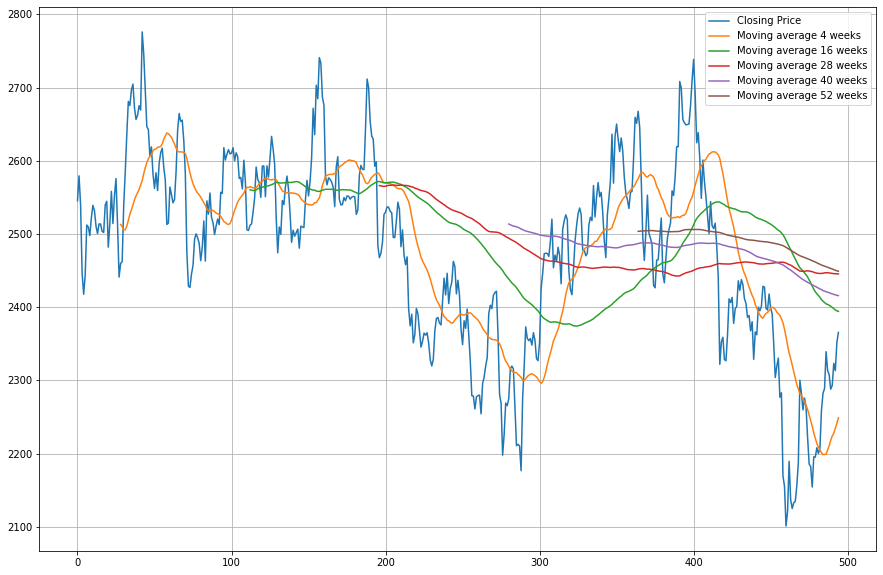

In [28]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(tcs['Close'], label='Closing Price')
plt.plot(tcs['SMA4'], label='Moving average 4 weeks')
plt.plot(tcs['SMA16'], label='Moving average 16 weeks')
plt.plot(tcs['SMA28'], label='Moving average 28 weeks')
plt.plot(tcs['SMA40'], label='Moving average 40 weeks')
plt.plot(tcs['SMA52'], label='Moving average 52 weeks')
plt.legend()

In [29]:
# Define exponential average function
def exp_avg(close, window):
    ema = close.ewm(window).mean().shift()
    return ema

## Rolling window size 10

In [30]:
window = 10
infy['EMA10'] = exp_avg(infy['Close'], window)
tcs['EMA10'] = exp_avg(tcs['Close'], window)
n500['EMA10'] = exp_avg(n500['Close'], window)

## Rolling window size 50

In [31]:
window = 50
infy['EMA50'] = exp_avg(infy['Close'], window)
tcs['EMA50'] = exp_avg(tcs['Close'], window)
n500['EMA50'] = exp_avg(n500['Close'], window)

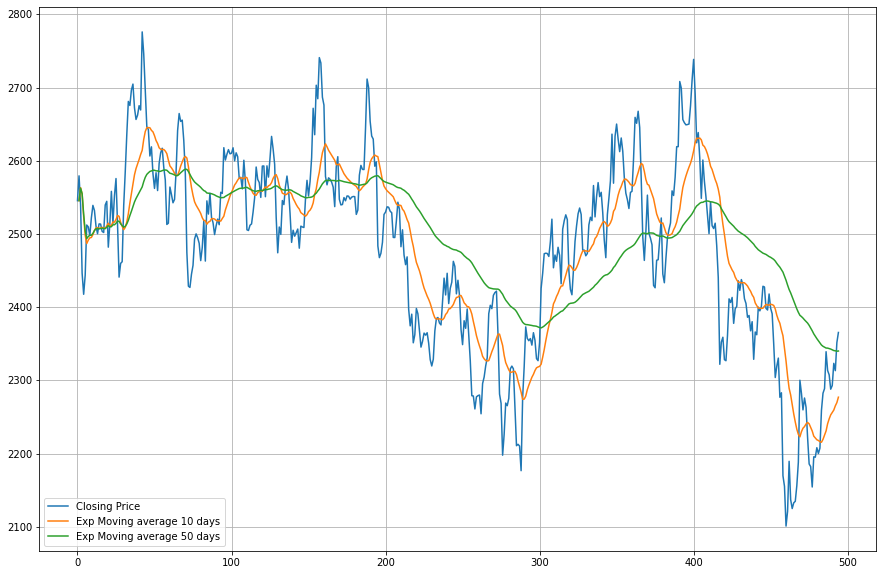

In [32]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(tcs['Close'], label='Closing Price')
plt.plot(tcs['EMA10'], label='Exp Moving average 10 days')
plt.plot(tcs['EMA50'], label='Exp Moving average 50 days')
plt.legend()

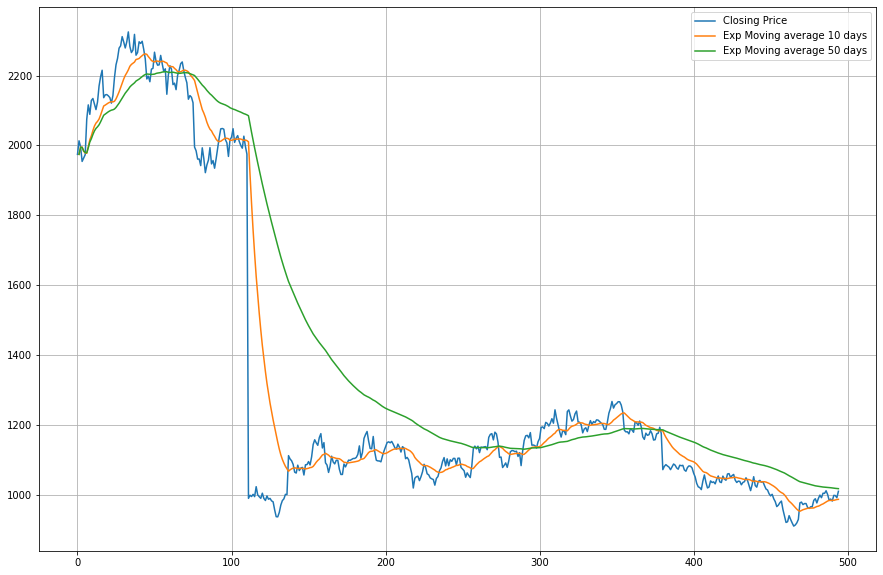

In [33]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(infy['Close'], label='Closing Price')
plt.plot(infy['EMA10'], label='Exp Moving average 10 days')
plt.plot(infy['EMA50'], label='Exp Moving average 50 days')
plt.legend()

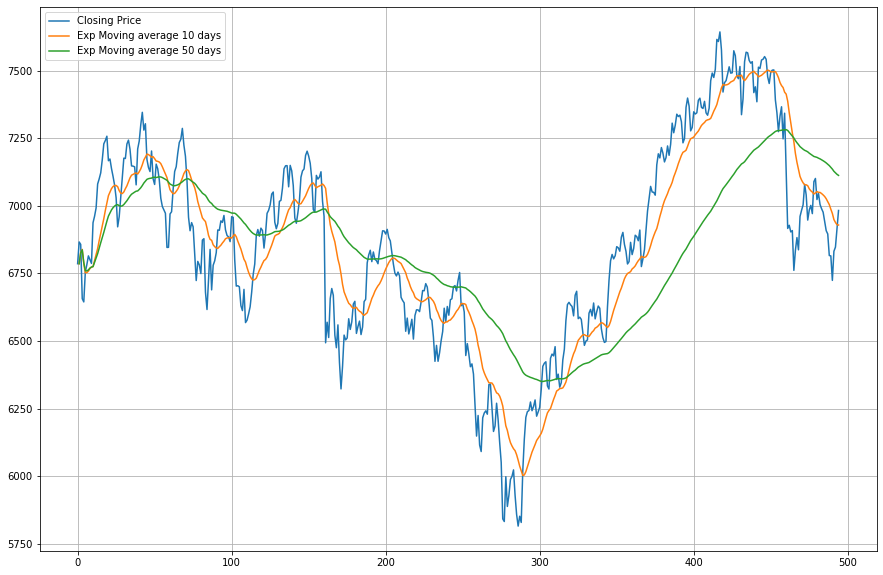

In [34]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(n500['Close'], label='Closing Price')
plt.plot(n500['EMA10'], label='Exp Moving average 10 days')
plt.plot(n500['EMA50'], label='Exp Moving average 50 days')
plt.legend()

### Relative strength index

In [35]:
def rsi(df, n=14):
    c = df['Close']
    delta = c.diff()
    delta = delta[1:]
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    rup = up.rolling(n).mean()
    rdown = down.abs().rolling(n).mean()
    rs = rup / rdown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

In [36]:
tcs['RSI'] = rsi(tcs).fillna(0)
infy['RSI'] = rsi(infy).fillna(0)
n500['RSI'] = rsi(n500).fillna(0)

### Moving average convergence divergence

In [37]:
# Moving average convergence divergence
tcs['MACD'] = tcs['EMA10'] - tcs['EMA50']
infy['MACD'] = infy['EMA10'] - infy['EMA50']
n500['MACD'] = n500['EMA10'] - n500['EMA50']

In [38]:
tcs['MACD_signal'] = pd.Series(tcs.MACD.ewm(span=9, min_periods=9).mean())
infy['MACD_signal'] = pd.Series(infy.MACD.ewm(span=9, min_periods=9).mean())
n500['MACD_signal'] = pd.Series(n500.MACD.ewm(span=9, min_periods=9).mean())

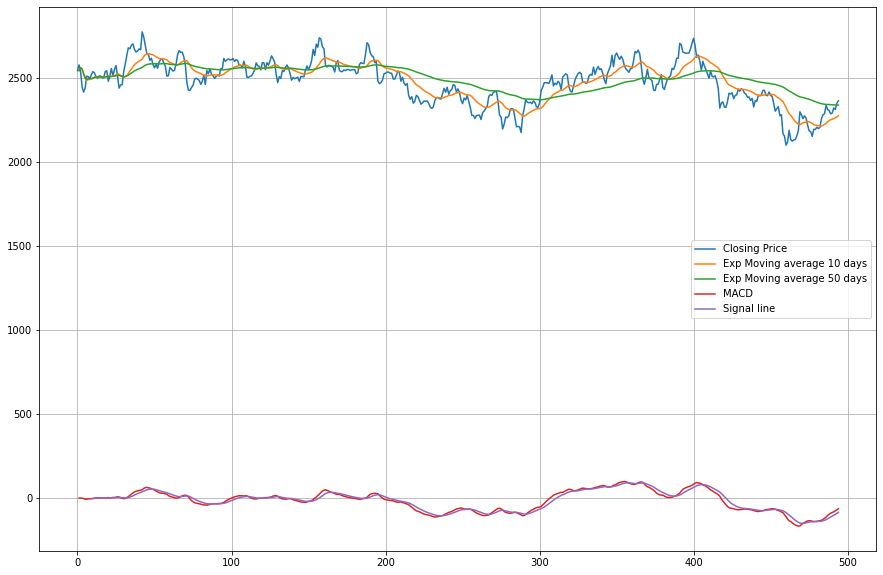

In [39]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(tcs['Close'], label='Closing Price')
plt.plot(tcs['EMA10'], label='Exp Moving average 10 days')
plt.plot(tcs['EMA50'], label='Exp Moving average 50 days')
plt.plot(tcs['MACD'], label='MACD')
plt.plot(tcs['MACD_signal'], label='Signal line')
plt.legend()

## Volume shock

### Define a function for volume shock

In [40]:
# Volume shock function: future should be 10% greater than the present
def volume_shock(present, future):
    if present < (1.1 * future):
        return 1
    else:
        return 0

### Volume shock for TCS

In [41]:
tcs['next_day_volume'] = tcs['Volume'].shift(-1)

In [42]:
tcs['volume_shock'] = list(map(volume_shock, tcs['Volume'],tcs['next_day_volume']))

In [43]:
tcs

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462870.0,1
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2545.55,NaN,NaN,NaN,NaN,NaN,2545.550000,2545.550000,0.000000,0.000000,NaN,877121.0,1
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,2579.45,NaN,NaN,NaN,NaN,NaN,2563.307143,2562.667822,0.000000,0.639321,NaN,1211892.0,1
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,2540.25,NaN,NaN,NaN,NaN,NaN,2554.878399,2555.046759,0.000000,-0.168360,NaN,1318166.0,1
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,2446.60,NaN,NaN,NaN,NaN,NaN,2523.825059,2527.124509,0.000000,-3.299450,NaN,782704.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,TCS,EQ,2288.10,2266.0,2301.60,2266.00,2296.85,2293.10,2290.60,448704,1.027802e+14,29524,213160,0.4751,2288.10,2224.225000,2399.833482,2446.231378,2418.161964,2452.208104,2256.218467,2341.822262,69.392401,-85.603795,-106.912425,647346.0,1
491,2016-12-27,TCS,EQ,2293.10,2281.5,2330.00,2281.50,2322.80,2323.40,2317.79,647346,1.500411e+14,42719,358760,0.5542,2293.10,2227.921429,2398.047768,2445.904082,2417.485000,2451.273489,2259.571334,2340.866866,79.309148,-81.295532,-101.789047,675209.0,1
492,2016-12-28,TCS,EQ,2323.40,2326.7,2349.90,2303.15,2305.25,2313.40,2335.86,675209,1.577194e+14,65267,420288,0.6225,2323.40,2234.571429,2396.275446,2445.777041,2416.833750,2450.468956,2265.373940,2340.524359,72.902472,-75.150419,-96.461321,981758.0,1
493,2016-12-29,TCS,EQ,2313.40,2303.0,2359.90,2303.00,2355.00,2351.70,2346.25,981758,2.303445e+14,64945,575262,0.5860,2313.40,2241.296429,2395.097321,2445.512500,2416.269643,2449.695055,2269.739945,2339.992478,76.548447,-70.252532,-91.219563,702874.0,0


### Volume shock for infy

In [44]:
infy['next_day_volume'] = infy['Volume'].shift(-1)
infy['volume_shock'] = list(map(volume_shock, infy['Volume'],infy['next_day_volume']))
infy

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1694580.0,1
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,NaN,NaN,NaN,NaN,NaN,1974.400000,1974.400000,0.000000,0.000000,NaN,2484256.0,1
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,NaN,NaN,NaN,NaN,NaN,1994.723810,1993.992079,0.000000,0.731730,NaN,2416829.0,1
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,NaN,NaN,NaN,NaN,NaN,1995.153776,1994.640687,0.000000,0.513089,NaN,1812479.0,0
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,NaN,NaN,NaN,NaN,NaN,1983.408576,1984.228251,0.000000,-0.819675,NaN,3391230.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,INFY,EQ,988.45,988.00,994.00,975.10,983.35,982.75,983.28,1606914,1.580050e+14,47565,958338,0.5964,969.175000,1023.105357,1098.750255,1099.421607,1098.283242,984.853703,1020.211286,56.629947,-35.357583,-43.177105,2456408.0,1
491,2016-12-27,INFY,EQ,982.75,982.75,1001.90,980.00,996.90,998.95,993.09,2456408,2.439426e+14,57508,1430604,0.5824,970.669643,1021.220982,1097.751531,1098.921071,1098.281731,984.662457,1019.476707,61.738190,-34.814249,-41.504534,2738408.0,1
492,2016-12-28,INFY,EQ,998.95,1002.95,1009.80,995.00,999.00,998.50,1003.15,2738408,2.747040e+14,81224,1853359,0.6768,973.139286,1019.637946,1097.019133,1098.423393,1098.332418,985.961325,1019.074199,55.730244,-33.112874,-39.826202,3120062.0,1
493,2016-12-29,INFY,EQ,998.50,1003.75,1008.00,988.15,990.00,992.35,997.88,3120062,3.113452e+14,92963,2303901,0.7384,975.942857,1018.976786,1096.281888,1097.937321,1098.445055,987.101204,1018.670760,51.226492,-31.569555,-38.174873,3633884.0,1


### Volume shock for nifty 500

In [45]:
n500['next_day_volume'] = n500['Volume'].shift(-1)
n500['volume_shock'] = list(map(volume_shock, n500['Volume'], n500['next_day_volume']))
n500

,Date,Open,High,Low,Close,Volume,Turnover,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock
0,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617743719.0,1
1,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,NaN,NaN,NaN,NaN,NaN,6786.100000,6786.100000,0.000000,0.000000,NaN,614330577.0,1
2,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,NaN,NaN,NaN,NaN,NaN,6828.188095,6826.672772,0.000000,1.515323,NaN,716905569.0,1
3,2015-01-06,6817.65,6817.65,6646.40,6656.80,716905569,1.563956e+11,NaN,NaN,NaN,NaN,NaN,6838.885045,6837.135662,0.000000,1.749383,NaN,723294637.0,1
4,2015-01-07,6653.65,6680.50,6605.40,6644.95,723294637,1.507763e+11,NaN,NaN,NaN,NaN,NaN,6786.664577,6790.703870,0.000000,-4.039293,NaN,654891539.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,6800.20,6801.80,6720.25,6724.45,499941890,1.182531e+11,969.175000,1023.105357,1098.750255,1099.421607,1098.283242,6971.798445,7135.695041,26.163241,-163.896596,-141.827046,568808578.0,1
491,2016-12-27,6730.90,6840.85,6711.65,6832.00,568808578,1.324917e+11,970.669643,1021.220982,1097.751531,1098.921071,1098.281731,6949.312223,7127.630930,39.430524,-178.318707,-149.125378,565570193.0,1
492,2016-12-28,6849.45,6902.00,6839.90,6847.40,565570193,1.403077e+11,973.139286,1019.637946,1097.019133,1098.423393,1098.332418,6938.647475,7121.833904,28.245030,-183.186429,-155.937588,864984299.0,1
493,2016-12-29,6846.80,6920.90,6839.80,6915.45,864984299,1.800378e+11,975.942857,1018.976786,1096.281888,1097.937321,1098.445055,6930.352250,7116.452538,34.828431,-186.100287,-161.970128,636193679.0,0


## Price shock

### Define a function for price shock

In [46]:
# Price shock function: if t and t+1 has a difference greater than 2%
def price_shock(t, t1):
    if abs((t-t1)/t) > 0.02:
        return 1
    else:
        return 0

### Price shock for TCS

In [47]:
tcs['next_day_close'] = tcs['Close'].shift(-1)
tcs['price_shock'] = list(map(price_shock, tcs['Close'], tcs['next_day_close']))
tcs

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock,next_day_close,price_shock
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462870.0,1,2579.45,0
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2545.55,NaN,NaN,NaN,NaN,NaN,2545.550000,2545.550000,0.000000,0.000000,NaN,877121.0,1,2540.25,0
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,2579.45,NaN,NaN,NaN,NaN,NaN,2563.307143,2562.667822,0.000000,0.639321,NaN,1211892.0,1,2446.60,1
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,2540.25,NaN,NaN,NaN,NaN,NaN,2554.878399,2555.046759,0.000000,-0.168360,NaN,1318166.0,1,2417.70,0
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,2446.60,NaN,NaN,NaN,NaN,NaN,2523.825059,2527.124509,0.000000,-3.299450,NaN,782704.0,0,2443.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,TCS,EQ,2288.10,2266.0,2301.60,2266.00,2296.85,2293.10,2290.60,448704,1.027802e+14,29524,213160,0.4751,2288.10,2224.225000,2399.833482,2446.231378,2418.161964,2452.208104,2256.218467,2341.822262,69.392401,-85.603795,-106.912425,647346.0,1,2323.40,0
491,2016-12-27,TCS,EQ,2293.10,2281.5,2330.00,2281.50,2322.80,2323.40,2317.79,647346,1.500411e+14,42719,358760,0.5542,2293.10,2227.921429,2398.047768,2445.904082,2417.485000,2451.273489,2259.571334,2340.866866,79.309148,-81.295532,-101.789047,675209.0,1,2313.40,0
492,2016-12-28,TCS,EQ,2323.40,2326.7,2349.90,2303.15,2305.25,2313.40,2335.86,675209,1.577194e+14,65267,420288,0.6225,2323.40,2234.571429,2396.275446,2445.777041,2416.833750,2450.468956,2265.373940,2340.524359,72.902472,-75.150419,-96.461321,981758.0,1,2351.70,0
493,2016-12-29,TCS,EQ,2313.40,2303.0,2359.90,2303.00,2355.00,2351.70,2346.25,981758,2.303445e+14,64945,575262,0.5860,2313.40,2241.296429,2395.097321,2445.512500,2416.269643,2449.695055,2269.739945,2339.992478,76.548447,-70.252532,-91.219563,702874.0,0,2365.55,0


### Price shock for Infy

In [48]:
infy['next_day_close'] = infy['Close'].shift(-1)
infy['price_shock'] = list(map(price_shock, infy['Close'], infy['next_day_close']))
infy

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock,next_day_close,price_shock
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1694580.0,1,2013.20,0
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,NaN,NaN,NaN,NaN,NaN,1974.400000,1974.400000,0.000000,0.000000,NaN,2484256.0,1,1995.90,0
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,NaN,NaN,NaN,NaN,NaN,1994.723810,1993.992079,0.000000,0.731730,NaN,2416829.0,1,1954.20,1
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,NaN,NaN,NaN,NaN,NaN,1995.153776,1994.640687,0.000000,0.513089,NaN,1812479.0,0,1963.55,0
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,NaN,NaN,NaN,NaN,NaN,1983.408576,1984.228251,0.000000,-0.819675,NaN,3391230.0,1,1973.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,INFY,EQ,988.45,988.00,994.00,975.10,983.35,982.75,983.28,1606914,1.580050e+14,47565,958338,0.5964,969.175000,1023.105357,1098.750255,1099.421607,1098.283242,984.853703,1020.211286,56.629947,-35.357583,-43.177105,2456408.0,1,998.95,0
491,2016-12-27,INFY,EQ,982.75,982.75,1001.90,980.00,996.90,998.95,993.09,2456408,2.439426e+14,57508,1430604,0.5824,970.669643,1021.220982,1097.751531,1098.921071,1098.281731,984.662457,1019.476707,61.738190,-34.814249,-41.504534,2738408.0,1,998.50,0
492,2016-12-28,INFY,EQ,998.95,1002.95,1009.80,995.00,999.00,998.50,1003.15,2738408,2.747040e+14,81224,1853359,0.6768,973.139286,1019.637946,1097.019133,1098.423393,1098.332418,985.961325,1019.074199,55.730244,-33.112874,-39.826202,3120062.0,1,992.35,0
493,2016-12-29,INFY,EQ,998.50,1003.75,1008.00,988.15,990.00,992.35,997.88,3120062,3.113452e+14,92963,2303901,0.7384,975.942857,1018.976786,1096.281888,1097.937321,1098.445055,987.101204,1018.670760,51.226492,-31.569555,-38.174873,3633884.0,1,1010.60,0


### Price shock for nifty 500

In [49]:
n500['next_day_close'] = n500['Close'].shift(-1)
n500['price_shock'] = list(map(price_shock, n500['Close'], n500['next_day_close']))
n500

,Date,Open,High,Low,Close,Volume,Turnover,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock,next_day_close,price_shock
0,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617743719.0,1,6866.45,0
1,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,NaN,NaN,NaN,NaN,NaN,6786.100000,6786.100000,0.000000,0.000000,NaN,614330577.0,1,6857.45,0
2,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,NaN,NaN,NaN,NaN,NaN,6828.188095,6826.672772,0.000000,1.515323,NaN,716905569.0,1,6656.80,1
3,2015-01-06,6817.65,6817.65,6646.40,6656.80,716905569,1.563956e+11,NaN,NaN,NaN,NaN,NaN,6838.885045,6837.135662,0.000000,1.749383,NaN,723294637.0,1,6644.95,0
4,2015-01-07,6653.65,6680.50,6605.40,6644.95,723294637,1.507763e+11,NaN,NaN,NaN,NaN,NaN,6786.664577,6790.703870,0.000000,-4.039293,NaN,654891539.0,0,6755.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,6800.20,6801.80,6720.25,6724.45,499941890,1.182531e+11,969.175000,1023.105357,1098.750255,1099.421607,1098.283242,6971.798445,7135.695041,26.163241,-163.896596,-141.827046,568808578.0,1,6832.00,0
491,2016-12-27,6730.90,6840.85,6711.65,6832.00,568808578,1.324917e+11,970.669643,1021.220982,1097.751531,1098.921071,1098.281731,6949.312223,7127.630930,39.430524,-178.318707,-149.125378,565570193.0,1,6847.40,0
492,2016-12-28,6849.45,6902.00,6839.90,6847.40,565570193,1.403077e+11,973.139286,1019.637946,1097.019133,1098.423393,1098.332418,6938.647475,7121.833904,28.245030,-183.186429,-155.937588,864984299.0,1,6915.45,0
493,2016-12-29,6846.80,6920.90,6839.80,6915.45,864984299,1.800378e+11,975.942857,1018.976786,1096.281888,1097.937321,1098.445055,6930.352250,7116.452538,34.828431,-186.100287,-161.970128,636193679.0,0,6982.80,0


## Pricing Black Swan

### Define a function for pricing black swan

In [50]:
# Pricing black swan function: if t and t+1 has a difference greater than 5%
def price_bs(t, t1):
    if abs((t-t1)/t) > 0.05:
        return 1
    else:
        return 0

### Pricing black swan for TCS

In [51]:
tcs['price_bs'] = list(map(price_bs, tcs['Close'], tcs['next_day_close']))
tcs

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock,next_day_close,price_shock,price_bs
0,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462870.0,1,2579.45,0,0
1,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683,2545.55,NaN,NaN,NaN,NaN,NaN,2545.550000,2545.550000,0.000000,0.000000,NaN,877121.0,1,2540.25,0,0
2,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207,2579.45,NaN,NaN,NaN,NaN,NaN,2563.307143,2562.667822,0.000000,0.639321,NaN,1211892.0,1,2446.60,1,0
3,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894,2540.25,NaN,NaN,NaN,NaN,NaN,2554.878399,2555.046759,0.000000,-0.168360,NaN,1318166.0,1,2417.70,0,0
4,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724,2446.60,NaN,NaN,NaN,NaN,NaN,2523.825059,2527.124509,0.000000,-3.299450,NaN,782704.0,0,2443.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,TCS,EQ,2288.10,2266.0,2301.60,2266.00,2296.85,2293.10,2290.60,448704,1.027802e+14,29524,213160,0.4751,2288.10,2224.225000,2399.833482,2446.231378,2418.161964,2452.208104,2256.218467,2341.822262,69.392401,-85.603795,-106.912425,647346.0,1,2323.40,0,0
491,2016-12-27,TCS,EQ,2293.10,2281.5,2330.00,2281.50,2322.80,2323.40,2317.79,647346,1.500411e+14,42719,358760,0.5542,2293.10,2227.921429,2398.047768,2445.904082,2417.485000,2451.273489,2259.571334,2340.866866,79.309148,-81.295532,-101.789047,675209.0,1,2313.40,0,0
492,2016-12-28,TCS,EQ,2323.40,2326.7,2349.90,2303.15,2305.25,2313.40,2335.86,675209,1.577194e+14,65267,420288,0.6225,2323.40,2234.571429,2396.275446,2445.777041,2416.833750,2450.468956,2265.373940,2340.524359,72.902472,-75.150419,-96.461321,981758.0,1,2351.70,0,0
493,2016-12-29,TCS,EQ,2313.40,2303.0,2359.90,2303.00,2355.00,2351.70,2346.25,981758,2.303445e+14,64945,575262,0.5860,2313.40,2241.296429,2395.097321,2445.512500,2416.269643,2449.695055,2269.739945,2339.992478,76.548447,-70.252532,-91.219563,702874.0,0,2365.55,0,0


### Pricing black swan for Infy

In [52]:
infy['price_bs'] = list(map(price_bs, infy['Close'], infy['next_day_close']))
infy

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock,next_day_close,price_shock,price_bs
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.90,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1694580.0,1,2013.20,0,0
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.00,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,NaN,NaN,NaN,NaN,NaN,1974.400000,1974.400000,0.000000,0.000000,NaN,2484256.0,1,1995.90,0,0
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.50,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,NaN,NaN,NaN,NaN,NaN,1994.723810,1993.992079,0.000000,0.731730,NaN,2416829.0,1,1954.20,1,0
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.10,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,NaN,NaN,NaN,NaN,NaN,1995.153776,1994.640687,0.000000,0.513089,NaN,1812479.0,0,1963.55,0,0
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.00,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,NaN,NaN,NaN,NaN,NaN,1983.408576,1984.228251,0.000000,-0.819675,NaN,3391230.0,1,1973.45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,INFY,EQ,988.45,988.00,994.00,975.10,983.35,982.75,983.28,1606914,1.580050e+14,47565,958338,0.5964,969.175000,1023.105357,1098.750255,1099.421607,1098.283242,984.853703,1020.211286,56.629947,-35.357583,-43.177105,2456408.0,1,998.95,0,0
491,2016-12-27,INFY,EQ,982.75,982.75,1001.90,980.00,996.90,998.95,993.09,2456408,2.439426e+14,57508,1430604,0.5824,970.669643,1021.220982,1097.751531,1098.921071,1098.281731,984.662457,1019.476707,61.738190,-34.814249,-41.504534,2738408.0,1,998.50,0,0
492,2016-12-28,INFY,EQ,998.95,1002.95,1009.80,995.00,999.00,998.50,1003.15,2738408,2.747040e+14,81224,1853359,0.6768,973.139286,1019.637946,1097.019133,1098.423393,1098.332418,985.961325,1019.074199,55.730244,-33.112874,-39.826202,3120062.0,1,992.35,0,0
493,2016-12-29,INFY,EQ,998.50,1003.75,1008.00,988.15,990.00,992.35,997.88,3120062,3.113452e+14,92963,2303901,0.7384,975.942857,1018.976786,1096.281888,1097.937321,1098.445055,987.101204,1018.670760,51.226492,-31.569555,-38.174873,3633884.0,1,1010.60,0,0


### Pricing black swan for nifty 500

In [53]:
n500['price_bs'] = list(map(price_bs, n500['Close'], n500['next_day_close']))
n500

,Date,Open,High,Low,Close,Volume,Turnover,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock,next_day_close,price_shock,price_bs
0,2015-01-01,6767.60,6794.25,6755.00,6786.10,440905954,7.133120e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617743719.0,1,6866.45,0,0
1,2015-01-02,6792.40,6883.05,6792.40,6866.45,617743719,1.216331e+11,NaN,NaN,NaN,NaN,NaN,6786.100000,6786.100000,0.000000,0.000000,NaN,614330577.0,1,6857.45,0,0
2,2015-01-05,6877.35,6913.25,6848.25,6857.45,614330577,1.231650e+11,NaN,NaN,NaN,NaN,NaN,6828.188095,6826.672772,0.000000,1.515323,NaN,716905569.0,1,6656.80,1,0
3,2015-01-06,6817.65,6817.65,6646.40,6656.80,716905569,1.563956e+11,NaN,NaN,NaN,NaN,NaN,6838.885045,6837.135662,0.000000,1.749383,NaN,723294637.0,1,6644.95,0,0
4,2015-01-07,6653.65,6680.50,6605.40,6644.95,723294637,1.507763e+11,NaN,NaN,NaN,NaN,NaN,6786.664577,6790.703870,0.000000,-4.039293,NaN,654891539.0,0,6755.45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2016-12-26,6800.20,6801.80,6720.25,6724.45,499941890,1.182531e+11,969.175000,1023.105357,1098.750255,1099.421607,1098.283242,6971.798445,7135.695041,26.163241,-163.896596,-141.827046,568808578.0,1,6832.00,0,0
491,2016-12-27,6730.90,6840.85,6711.65,6832.00,568808578,1.324917e+11,970.669643,1021.220982,1097.751531,1098.921071,1098.281731,6949.312223,7127.630930,39.430524,-178.318707,-149.125378,565570193.0,1,6847.40,0,0
492,2016-12-28,6849.45,6902.00,6839.90,6847.40,565570193,1.403077e+11,973.139286,1019.637946,1097.019133,1098.423393,1098.332418,6938.647475,7121.833904,28.245030,-183.186429,-155.937588,864984299.0,1,6915.45,0,0
493,2016-12-29,6846.80,6920.90,6839.80,6915.45,864984299,1.800378e+11,975.942857,1018.976786,1096.281888,1097.937321,1098.445055,6930.352250,7116.452538,34.828431,-186.100287,-161.970128,636193679.0,0,6982.80,0,0


### Pricing shock without volume shock

In [54]:
tcs_new = tcs.loc[(tcs['volume_shock']==0) & (tcs['price_shock']==1)]
tcs_new

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock,next_day_close,price_shock,price_bs
64,2015-04-07,TCS,EQ,2547.30,2562.45,2599.00,2544.00,2588.95,2585.00,2571.50,943461,2.426111e+14,77106,562689,0.5964,2547.30,2617.392857,NaN,NaN,NaN,NaN,2579.770323,2579.692409,53.519380,0.077914,12.229124,826067.0,0,2641.40,1,0
186,2015-09-30,TCS,EQ,2588.25,2643.70,2643.70,2570.95,2585.00,2588.05,2585.98,1684168,4.355227e+14,81073,1273762,0.7563,2588.25,2575.423214,2558.933036,NaN,NaN,NaN,2566.136477,2567.909778,69.031487,-1.773301,-1.769152,1417204.0,0,2644.60,1,0
266,2016-01-28,TCS,EQ,2319.75,2315.50,2348.90,2308.05,2345.00,2331.20,2334.21,1553330,3.625795e+14,52219,1005471,0.6473,2319.75,2362.403571,2475.949554,2504.816582,NaN,NaN,2326.658618,2428.688532,42.952666,-102.029913,-95.819915,1117872.0,0,2391.30,1,0
272,2016-02-05,TCS,EQ,2420.05,2408.10,2439.95,2408.10,2424.00,2421.95,2425.99,701498,1.701826e+14,80411,454027,0.6472,2420.05,2354.960714,2459.652679,2502.489031,NaN,NaN,2357.388418,2424.797892,86.350282,-67.409474,-83.710659,531829.0,0,2362.95,1,0
308,2016-03-31,TCS,EQ,2489.50,2478.30,2550.00,2472.15,2530.00,2520.30,2510.45,2181982,5.477753e+14,76600,1371053,0.6284,2489.50,2345.308929,2379.608482,2462.916837,2496.843393,NaN,2392.985717,2383.950638,80.631223,9.035079,-19.303352,1520700.0,0,2453.90,1,0
318,2016-04-18,TCS,EQ,2526.20,2453.00,2553.50,2440.00,2522.40,2519.75,2495.75,3560752,8.886760e+14,185897,1683724,0.4729,2526.20,2426.210714,2377.177232,2459.174235,2492.316607,NaN,2451.221780,2402.136900,57.244206,49.084879,31.930278,3202512.0,0,2450.35,1,0
348,2016-05-31,TCS,EQ,2636.40,2640.00,2647.00,2562.00,2567.50,2569.40,2581.37,1861304,4.804709e+14,84299,1333274,0.7163,2636.40,2515.312500,2406.223214,2454.835204,2481.402679,NaN,2530.993001,2454.291779,55.242101,76.701222,69.661903,955971.0,0,2633.55,1,0
370,2016-06-30,TCS,EQ,2502.90,2522.00,2562.90,2500.35,2548.05,2553.10,2532.82,2560906,6.486314e+14,103449,1864313,0.7280,2502.90,2577.696429,2444.378571,2452.034439,2487.707321,2504.626099,2567.977285,2500.491768,49.713668,67.485517,82.676897,1098648.0,0,2500.85,1,0
401,2016-08-16,TCS,EQ,2738.45,2738.00,2740.00,2673.85,2700.00,2691.70,2709.24,1591877,4.312776e+14,116813,1171765,0.7361,2738.45,2566.530357,2517.433482,2451.434694,2486.903750,2506.216621,2624.868186,2535.290639,69.820462,89.577547,68.723326,924283.0,0,2624.55,1,0
405,2016-08-22,TCS,EQ,2603.50,2588.00,2594.45,2536.30,2553.50,2548.70,2562.14,1132637,2.901978e+14,92781,718184,0.6341,2603.50,2593.403571,2528.434375,2454.021173,2487.773750,2505.920055,2628.597149,2543.187850,28.218430,85.409299,80.531882,751687.0,0,2601.05,1,0


In [55]:
infy_new = infy.loc[(infy['volume_shock']==0) & (infy['price_shock']==1)]
infy_new

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock,next_day_close,price_shock,price_bs
6,2015-01-09,INFY,EQ,1973.45,1980.10,2109.00,1913.05,2075.30,2074.45,2037.69,11215832,2.285439e+15,359214,3369489,0.3004,NaN,NaN,NaN,NaN,NaN,1977.561556,1978.793532,0.000000,-1.231977,NaN,3189722.0,0,2115.95,1,0
58,2015-03-26,INFY,EQ,2219.10,2208.00,2214.90,2132.00,2163.00,2146.35,2156.88,3935210,8.487761e+14,131427,2896200,0.7360,2255.883929,NaN,NaN,NaN,NaN,2235.889988,2210.747376,35.829251,25.142612,31.944817,2518555.0,0,2202.15,1,0
61,2015-03-31,INFY,EQ,2228.00,2245.00,2273.65,2204.35,2215.10,2218.35,2222.10,2004103,4.453316e+14,92432,1354814,0.6760,2245.353571,NaN,NaN,NaN,NaN,2225.626372,2209.263271,54.921715,16.363101,24.701688,1684622.0,0,2173.95,1,0
115,2015-06-19,INFY,EQ,1001.95,1010.30,1010.40,993.10,997.00,995.35,998.90,3335229,3.331554e+14,97129,2599496,0.7794,1860.219643,2089.837500,NaN,NaN,NaN,1689.136409,1992.587156,5.792414,-303.450747,-174.449685,2855434.0,0,1023.85,1,0
131,2015-07-13,INFY,EQ,937.50,941.00,955.00,934.05,950.60,950.15,945.97,3265884,3.089417e+14,84133,2399679,0.7348,1278.457143,1930.163839,NaN,NaN,NaN,1131.496338,1696.333513,31.505337,-564.837175,-531.268412,2683537.0,0,971.25,1,0
142,2015-07-28,INFY,EQ,1065.30,1068.50,1076.00,1054.25,1066.10,1062.85,1066.58,4238301,4.520496e+14,150481,2952854,0.6967,1004.414286,1815.241518,NaN,NaN,NaN,1076.787935,1558.858968,71.399553,-482.071033,-514.771404,3535667.0,0,1085.40,1,0
147,2015-08-04,INFY,EQ,1078.95,1078.00,1078.95,1051.00,1058.55,1057.25,1061.33,4549527,4.828550e+14,139666,3264905,0.7176,1017.185714,1760.733482,NaN,NaN,NaN,1076.218936,1510.615141,64.753273,-434.396205,-470.697496,2376738.0,0,1086.35,1,0
164,2015-08-27,INFY,EQ,1064.60,1088.00,1100.10,1078.05,1084.00,1082.80,1085.94,7671696,8.330972e+14,139887,5605100,0.7306,1100.855357,1588.211607,NaN,NaN,NaN,1109.576163,1393.657701,47.798418,-284.081538,-310.578715,3604410.0,0,1111.05,1,0
169,2015-09-03,INFY,EQ,1099.45,1110.15,1112.00,1092.50,1100.30,1099.35,1100.92,4295268,4.728764e+14,77626,3197225,0.7444,1103.500000,1537.447321,NaN,NaN,NaN,1104.252961,1364.513708,40.447933,-260.260747,-281.798321,3659444.0,0,1073.95,1,0
183,2015-09-24,INFY,EQ,1116.25,1113.50,1152.70,1110.00,1141.25,1140.55,1138.27,6699631,7.626005e+14,172169,4696664,0.7010,1104.246429,1398.714286,NaN,NaN,NaN,1098.684307,1296.911519,64.714286,-198.227213,-218.120786,4894232.0,0,1105.55,1,0


In [56]:
n500_new = n500.loc[(n500['volume_shock']==0) & (n500['price_shock']==1)]
n500_new

,Date,Open,High,Low,Close,Volume,Turnover,SMA4,SMA16,SMA28,SMA40,SMA52,EMA10,EMA50,RSI,MACD,MACD_signal,next_day_volume,volume_shock,next_day_close,price_shock,price_bs
262,2016-01-21,6171.20,6196.30,6067.3,6092.05,805563247,1.617007e+11,1091.710714,1101.993304,1299.302551,NaN,NaN,6430.142019,6629.742514,14.812254,-199.600495,-142.956923,703583091.0,0,6216.70,1,0
277,2016-02-12,5878.80,5878.80,5722.8,5833.40,1178283507,1.971743e+11,1119.350000,1104.820536,1225.306122,NaN,NaN,6222.441397,6514.088035,27.882285,-291.646637,-254.832114,864082667.0,0,5999.05,1,0
288,2016-02-29,5869.85,5897.95,5717.0,5829.95,1100649245,2.321257e+11,1129.391071,1107.202232,1177.573980,1473.185536,NaN,6021.279238,6397.246444,34.757952,-375.967205,-348.505887,779985409.0,0,6020.05,1,0
418,2016-09-09,7634.50,7634.50,7567.6,7575.55,1021072945,2.079411e+11,1052.003571,1154.981696,1137.051276,1128.627679,1265.729258,7435.924751,7053.266032,66.490398,382.658718,363.935709,892731386.0,0,7420.50,1,0


# Part 2 : Data Visualization

pip install altair 

pip install altair vega_datasets

In [57]:
pip install altair vega_datasets

In [58]:
import altair as alt

pip install vega

In [59]:
line1 = alt.Chart(infy).mark_line().encode(x='Date', y='Close')
line2 = alt.Chart(infy).mark_area(
    line={'color':'black'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='blue', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0)
    ).encode(x='Date', y='SMA52')

line3 = alt.Chart(infy_new).mark_point(color='green').encode(
    x='Date',
    y='Close'
)
line1+line2+line3

alt.LayerChart(...)

In [60]:
line = alt.Chart(infy).mark_line().encode(
    x='Date',
    y='Close', 
    color=alt.condition(
        alt.datum.volume_shock < 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange"))  # The negative color
).properties(width=1200)
line

alt.Chart(...)

In [61]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [62]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

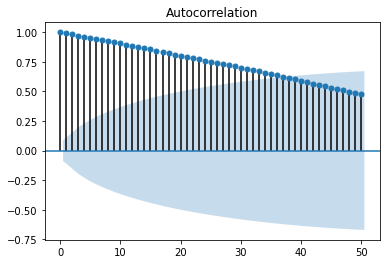

In [63]:
dt = infy[['Close']]
plot_acf(dt, lags=50)
plt.show()



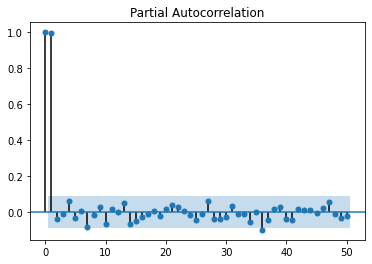

In [64]:
plot_pacf(dt, lags=50)
plt.show()

# Part 3

In [65]:
from sklearn.model_selection import train_test_split

### TCS

In [66]:
tcs_new = tcs

In [67]:
# Predict for next day price
tcs_new['Close'] = tcs_new['Close'].shift(-1)

In [68]:
tcs_new = tcs_new[:-1]  

In [69]:
tcs_new = tcs_new.drop(['Date','Open','High','Low','Last','Prev Close','VWAP','Volume','Turnover','Trades',
                  'Deliverable Volume','%Deliverble','SMA','Symbol','Series','next_day_volume','next_day_close',
                 'SMA28','SMA40','SMA52'],1)

In [70]:
tcs_new = tcs_new.dropna()

In [71]:
tcs_x = tcs_new.drop(['Close'],1)
tcs_y = tcs_new['Close'].copy()

In [72]:
tcs_x.reset_index()
tcs_y.reset_index()

,index,Close
0,112,2513.80
1,113,2530.05
2,114,2549.55
3,115,2591.50
4,116,2574.60
...,...,...
377,489,2293.10
378,490,2323.40
379,491,2313.40
380,492,2351.70


In [73]:
x_train_tcs , x_test_tcs, y_train_tcs, y_test_tcs = train_test_split(tcs_x , tcs_y, test_size=0.15)

In [74]:
x_train_tcs , x_valid_tcs, y_train_tcs, y_valid_tcs = train_test_split(x_train_tcs , y_train_tcs, test_size=0.177)

In [75]:
print('x train shape : ', x_train_tcs.shape)
print('y train shape : ', y_train_tcs.shape)

print('x valid shape :', x_valid_tcs.shape)
print('y valid shape :', y_valid_tcs.shape)

print('x test shape :', x_test_tcs.shape)
print('y test shape :', y_test_tcs.shape)

x train shape :  (266, 10)
y train shape :  (266,)
x valid shape : (58, 10)
y valid shape : (58,)
x test shape : (58, 10)
y test shape : (58,)


### Gridsearch

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import cross_val_score, KFold
import math

In [77]:
param = {
    'n_estimators': [100, 200, 300, 400, 500, 700, 1000, 1200],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [4, 8, 10, 12, 15, 20],
    'gamma': [0.001, 0.005, 0.01, 0.05],
    'random_state': [10]
    }

In [78]:
eval_set = [x_valid_tcs, y_valid_tcs]
model_wo_grid = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
model_wo_grid.fit(x_train_tcs, y_train_tcs, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1,
             eval_set=[            SMA4        SMA16        EMA10  ...  volume_shock  price_shock  price_bs
439  2411.764286  2525.009821  2413.576163  ...             1            0         0
247  2387.296429  2511.847321  2413.802483  ...             0            0         0
347  2508.667857  2403.920089  2520.452302  ...             1            1         0
280  2319.394643  2438.658929  2314.538105  ...             1            0         0
290  2300.262500  2411.93...
252    2397.60
456    2283.20
429    2423.05
Name: Close, dtype: float64],
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None,

In [79]:
y_pred_tcs = model_wo_grid.predict(x_valid_tcs)
mse_wo_grid = mean_squared_error(y_valid_tcs, y_pred_tcs)
print('Mean squared error without grid search',mse_wo_grid)

Mean squared error without grid search 1795.9343890405153


In [80]:
eval_set = [x_valid_tcs, y_valid_tcs]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
grid = GridSearchCV(model, param)
grid.fit(x_train_tcs, y_train_tcs)


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    eval_set=[            SMA4        SMA16        EMA10  ...  volume_shock  price_shock  price_bs
439  2411.764286  2525.009821  2413.576163  ...             1            0         0
247  2387.296429  2511.847321  2413.802483  ...             0            0         0
347  2508.667857  2403.920089  2520.452302  ...             1            1         0
280  2319.394643  24...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbose=False, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.001, 0.005, 0.01, 0.05],
                         'learning_rate': [0.001, 0.005, 0.01, 0.05],
              

In [81]:
print('Best parameters : ',grid.best_params_)
print('Score :',grid.best_score_)

Best parameters :  {'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000, 'random_state': 10}
Score : 0.906338963576218


In [82]:
model = xgb.XGBRegressor(**grid.best_params_, objective='reg:squarederror')
model.fit(x_train_tcs, y_train_tcs, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.05,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

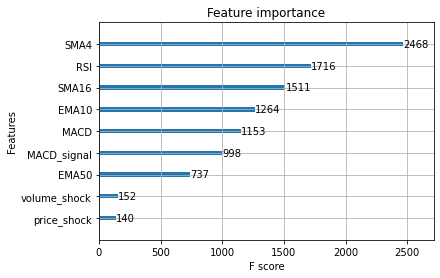

In [83]:
plot_importance(model)

In [84]:
y_pred_tcs = model.predict(x_valid_tcs)

In [85]:
mse = mean_squared_error(y_valid_tcs, y_pred_tcs)
print('Mean squared error :',mse)
print('Root mean squared error : ', math.sqrt(mse))

Mean squared error : 1543.2881205134597
Root mean squared error :  39.284705936451395


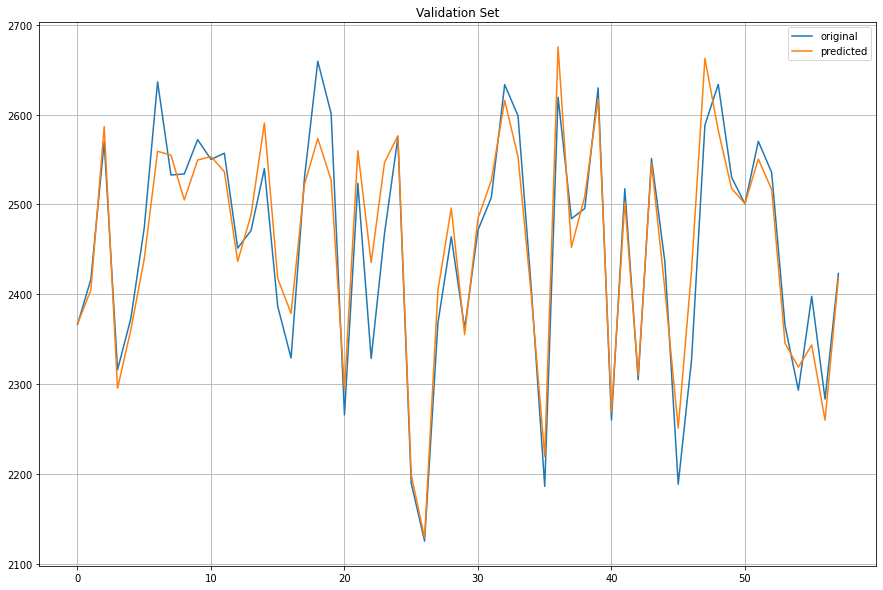

In [86]:
plt.figure(figsize=[15,10])
plt.grid(True)
ax = range(len(y_valid_tcs))
plt.plot(ax, y_valid_tcs, label="original")
plt.plot(ax, y_pred_tcs, label="predicted")
plt.title("Validation Set")
plt.legend()
plt.show()

### K-Fold

In [87]:
#Cross validataion 
scores = cross_val_score(model, x_train_tcs, y_train_tcs, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.91


In [88]:
# K-Fold
kfold = KFold(n_splits=3, shuffle=True)
kf_cv_scores = cross_val_score(model, x_train_tcs, y_train_tcs, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.89


In [89]:
y_pred_tcs = model.predict(x_test_tcs)
mse = mean_squared_error(y_test_tcs, y_pred_tcs)
print('Mean squared error :',mse)
print('Root mean squared error : ', math.sqrt(mse))

Mean squared error : 1931.8208668826778
Root mean squared error :  43.952484194669566


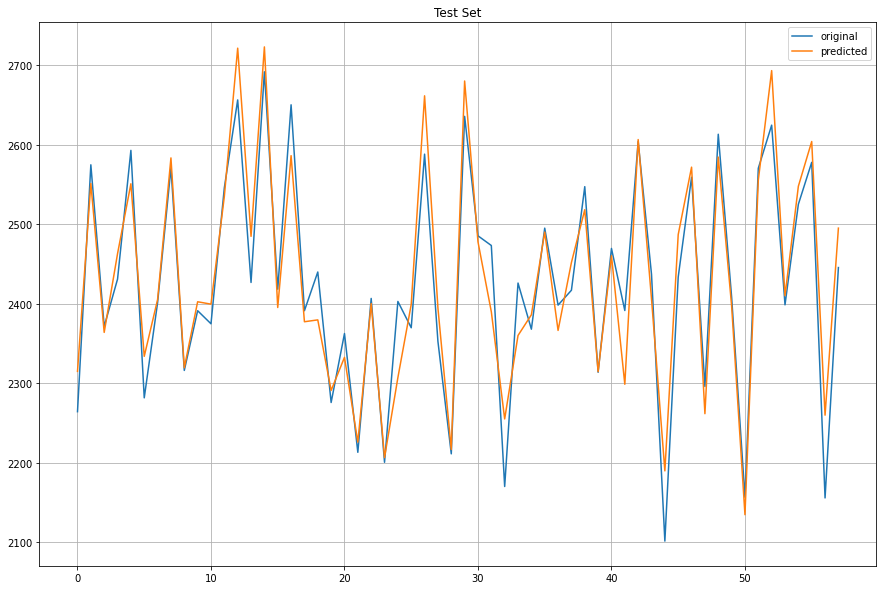

In [90]:
plt.figure(figsize=[15,10])
plt.grid(True)
ax = range(len(y_test_tcs))
plt.plot(ax, y_test_tcs, label="original")
plt.plot(ax, y_pred_tcs, label="predicted")
plt.title("Test Set")
plt.legend()
plt.show()

### OLS

In [91]:
import statsmodels.api as sm 

In [92]:
x = tcs_new['RSI'].tolist() 
y = tcs_new['Close'].tolist() 

In [93]:
x = sm.add_constant(x)
result = sm.OLS(y, x).fit() 

In [94]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     71.19
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           6.88e-16
Time:                        16:05:05   Log-Likelihood:                -2379.2
No. Observations:                 382   AIC:                             4762.
Df Residuals:                     380   BIC:                             4770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2286.6464     20.872    109.556      0.0

In [95]:
x = tcs_new['RSI'].tolist() 
y = tcs_new['Close'].tolist()
x = sm.add_constant(x)
result = sm.OLS(y, x).fit() 

In [96]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     71.19
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           6.88e-16
Time:                        16:05:05   Log-Likelihood:                -2379.2
No. Observations:                 382   AIC:                             4762.
Df Residuals:                     380   BIC:                             4770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2286.6464     20.872    109.556      0.0

### Infy

In [97]:
infy_new = infy
# Predict for next day price
infy_new['Close'] = infy_new['Close'].shift(-1)
infy_new = infy_new.drop(['Date','Open','High','Low','Last','Prev Close','VWAP','Volume','Turnover','Trades',
                  'Deliverable Volume','%Deliverble','Symbol','Series','next_day_volume','next_day_close',
                 'SMA28','SMA40','SMA52'],1)

infy_new = infy_new.dropna()

infy_x = infy_new.drop(['Close'],1)
infy_y = infy_new['Close'].copy()

infy_x.reset_index()
infy_y.reset_index()

,index,Close
0,112,995.70
1,113,1001.95
2,114,995.35
3,115,1023.85
4,116,1000.40
...,...,...
377,489,982.75
378,490,998.95
379,491,998.50
380,492,992.35


In [98]:
x_train_infy , x_test_infy, y_train_infy, y_test_infy = train_test_split(infy_x , infy_y, test_size=0.15)

In [99]:
x_train_infy , x_valid_infy, y_train_infy, y_valid_infy = train_test_split(x_train_infy , y_train_infy, test_size=0.177)

In [100]:
print('x train shape : ', x_train_infy.shape)
print('y train shape : ', y_train_infy.shape)

print('x valid shape :', x_valid_infy.shape)
print('y valid shape :', y_valid_infy.shape)

print('x test shape :', x_test_infy.shape)
print('y test shape :', y_test_infy.shape)

x train shape :  (266, 10)
y train shape :  (266,)
x valid shape : (58, 10)
y valid shape : (58,)
x test shape : (58, 10)
y test shape : (58,)


In [101]:
eval_set = [x_valid_infy, y_valid_infy]
model_wo_grid = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
model_wo_grid.fit(x_train_infy, y_train_infy, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1,
             eval_set=[            SMA4        SMA16        EMA10  ...  volume_shock  price_shock  price_bs
282  1124.364286  1104.673661  1116.649192  ...             1            0         0
222  1110.280357  1088.248214  1093.623169  ...             1            0         0
425  1044.950000  1144.782143  1049.361500  ...             0            0         0
432  1040.905357  1135.251339  1045.464286  ...             0            0         0
205  1128.528571  1227.44...
167    1099.45
213    1107.60
490     998.95
Name: Close, dtype: float64],
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None,

In [102]:
y_pred_infy = model_wo_grid.predict(x_valid_infy)
mse_wo_grid = mean_squared_error(y_valid_infy, y_pred_infy)
print('Mean squared error without grid search',mse_wo_grid)

Mean squared error without grid search 216.83146801333783


In [103]:
eval_set = [x_valid_infy, y_valid_infy]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
grid = GridSearchCV(model, param)
grid.fit(x_train_infy, y_train_infy)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    eval_set=[            SMA4        SMA16        EMA10  ...  volume_shock  price_shock  price_bs
282  1124.364286  1104.673661  1116.649192  ...             1            0         0
222  1110.280357  1088.248214  1093.623169  ...             1            0         0
425  1044.950000  1144.782143  1049.361500  ...             0            0         0
432  1040.905357  11...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbose=False, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.001, 0.005, 0.01, 0.05],
                         'learning_rate': [0.001, 0.005, 0.01, 0.05],
              

In [104]:
print('Best parameters : ',grid.best_params_)
print('Score :',grid.best_score_)

Best parameters :  {'gamma': 0.005, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500, 'random_state': 10}
Score : 0.9385346681069429


In [105]:
model = xgb.XGBRegressor(**grid.best_params_, objective='reg:squarederror')
model.fit(x_train_infy, y_train_infy, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.005,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

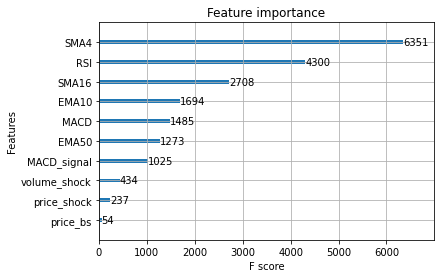

In [106]:
plot_importance(model)

In [107]:
y_pred_infy = model.predict(x_valid_infy)
mse = mean_squared_error(y_valid_infy, y_pred_infy)
print('Mean squared error :',mse)
print('Root mean squared error : ', math.sqrt(mse))

Mean squared error : 233.92672985481033
Root mean squared error :  15.29466344365937


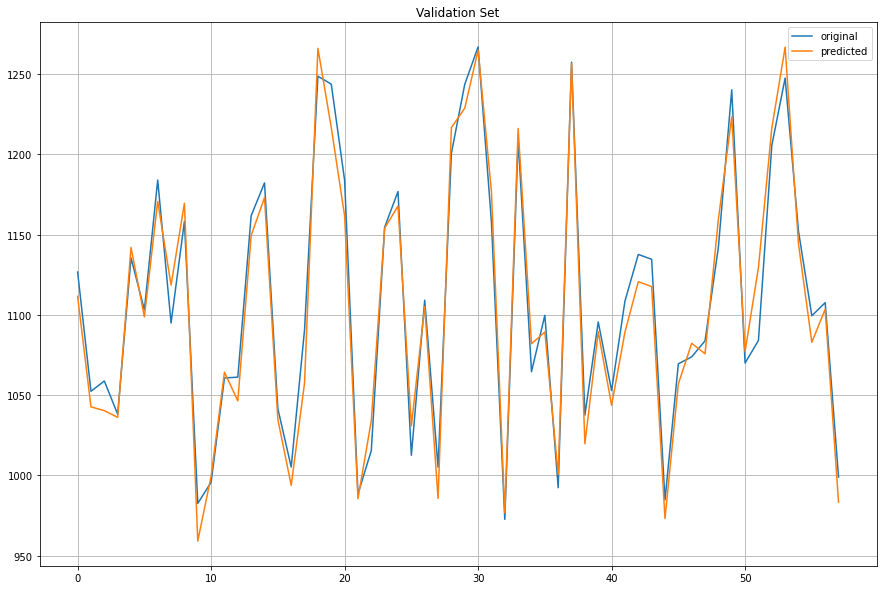

In [108]:
plt.figure(figsize=[15,10])
plt.grid(True)
ax = range(len(y_valid_infy))
plt.plot(ax, y_valid_infy, label="original")
plt.plot(ax, y_pred_infy, label="predicted")
plt.title("Validation Set")
plt.legend()
plt.show()

### K-Fold

In [109]:
# K-Fold
kfold = KFold(n_splits=3, shuffle=True)
kf_cv_scores = cross_val_score(model, x_train_infy, y_train_infy, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.93


### Test set

In [110]:
y_pred_infy = model.predict(x_test_infy)
mse = mean_squared_error(y_test_infy, y_pred_infy)
print('Mean squared error :',mse)
print('Root mean squared error : ', math.sqrt(mse))

Mean squared error : 451.4432756771997
Root mean squared error :  21.247194536625294


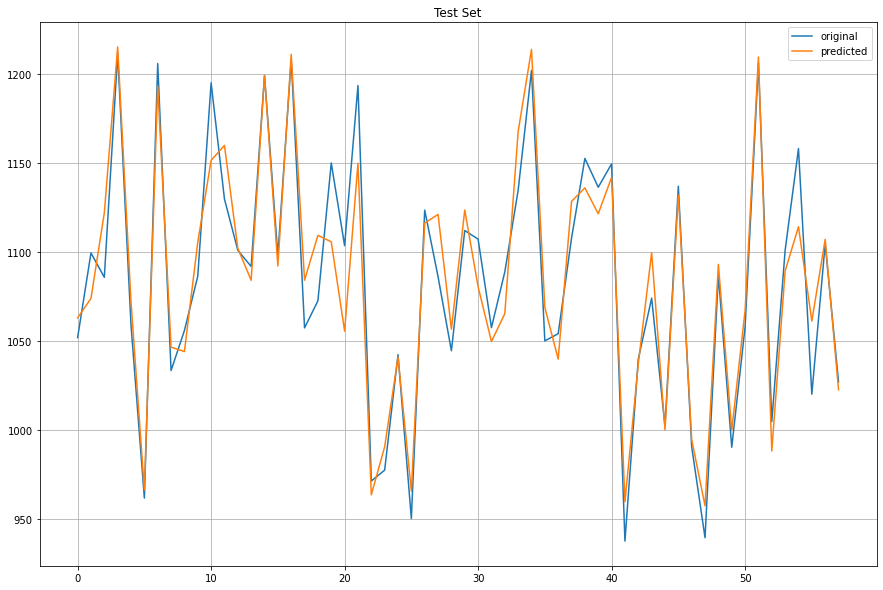

In [111]:
plt.figure(figsize=[15,10])
plt.grid(True)
ax = range(len(y_test_infy))
plt.plot(ax, y_test_infy, label="original")
plt.plot(ax, y_pred_infy, label="predicted")
plt.title("Test Set")
plt.legend()
plt.show()

### OLS

In [112]:
x = infy_new['RSI'].tolist() 
y = infy_new['Close'].tolist()
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()

In [113]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     79.27
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           2.26e-17
Time:                        16:17:43   Log-Likelihood:                -2179.4
No. Observations:                 382   AIC:                             4363.
Df Residuals:                     380   BIC:                             4371.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        996.0861     11.559     86.174      0.0

In [114]:
x = infy_new['MACD'].tolist() 
y = infy_new['Close'].tolist()
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()

In [115]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     66.23
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           5.78e-15
Time:                        16:17:43   Log-Likelihood:                -2184.9
No. Observations:                 382   AIC:                             4374.
Df Residuals:                     380   BIC:                             4382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1114.9031      4.608    241.963      0.0

### NIFTY 500

In [116]:
n500_new = n500
# Predict for next day price
n500_new['Close'] = n500_new['Close'].shift(-1)
n500_new = n500_new.drop(['Date','Open','High','Low','Volume','Turnover','next_day_volume','next_day_close',
                         'SMA28','SMA40','SMA52'],1)

n500_new = n500_new.dropna()

n500_x = n500_new.drop(['Close'],1)
n500_y = n500_new['Close'].copy()

n500_x.reset_index()
n500_y.reset_index()
n500_x

,SMA4,SMA16,EMA10,EMA50,RSI,MACD,MACD_signal,volume_shock,price_shock,price_bs
112,1963.741071,2116.502679,6740.283517,6908.776303,32.041470,-168.492786,-138.076764,1,0,0
113,1930.003571,2107.796875,6729.984799,6902.591314,37.620025,-172.606516,-144.982714,1,0,0
114,1895.637500,2098.712054,6725.513368,6897.734372,35.390947,-172.221004,-150.430372,1,0,0
115,1860.219643,2089.837500,6727.453096,6894.437752,38.733085,-166.984656,-153.741229,1,0,0
116,1826.228571,2081.276339,6732.693806,6892.054210,56.342680,-159.360404,-154.865064,0,0,0
...,...,...,...,...,...,...,...,...,...,...
489,966.857143,1024.784821,6987.488290,7142.111341,33.339892,-154.623052,-136.309659,0,0,0
490,969.175000,1023.105357,6971.798445,7135.695041,26.163241,-163.896596,-141.827046,1,0,0
491,970.669643,1021.220982,6949.312223,7127.630930,39.430524,-178.318707,-149.125378,1,0,0
492,973.139286,1019.637946,6938.647475,7121.833904,28.245030,-183.186429,-155.937588,1,0,0


In [117]:
x_train_n500 , x_test_n500, y_train_n500, y_test_n500 = train_test_split(n500_x , n500_y, test_size=0.15)

In [118]:
x_train_n500 , x_valid_n500, y_train_n500, y_valid_n500 = train_test_split(x_train_n500 , y_train_n500,
                                                                           test_size=0.177)

In [119]:
print('x train shape : ', x_train_n500.shape)
print('y train shape : ', y_train_infy.shape)

print('x valid shape :', x_valid_infy.shape)
print('y valid shape :', y_valid_infy.shape)

print('x test shape :', x_test_infy.shape)
print('y test shape :', y_test_infy.shape)

x train shape :  (266, 10)
y train shape :  (266,)
x valid shape : (58, 10)
y valid shape : (58,)
x test shape : (58, 10)
y test shape : (58,)


In [120]:
eval_set = [x_valid_n500, y_valid_n500]
model_wo_grid = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
model_wo_grid.fit(x_train_n500, y_train_n500, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1,
             eval_set=[            SMA4        SMA16        EMA10  ...  volume_shock  price_shock  price_bs
451  1034.435714  1104.958036  7495.068725  ...             1            0         0
488   964.601786  1026.484375  7004.602119  ...             1            0         0
348  1210.558929  1156.039732  6613.639316  ...             0            0         0
481   956.435714  1037.101339  7049.869275  ...             1            0         0
331  1205.901786  1132.3267...
409    7361.00
299    6255.75
301    6406.70
Name: Close, dtype: float64],
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=Non

In [121]:
y_pred_n500 = model_wo_grid.predict(x_valid_n500)
mse_wo_grid = mean_squared_error(y_valid_n500, y_pred_n500)
print('Mean squared error without grid search',mse_wo_grid)

Mean squared error without grid search 6196.396448063033


In [122]:
eval_set = [x_valid_n500, y_valid_n500]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
grid = GridSearchCV(model, param)
grid.fit(x_train_n500, y_train_n500)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    eval_set=[            SMA4        SMA16        EMA10  ...  volume_shock  price_shock  price_bs
451  1034.435714  1104.958036  7495.068725  ...             1            0         0
488   964.601786  1026.484375  7004.602119  ...             1            0         0
348  1210.558929  1156.039732  6613.639316  ...             0            0         0
481   956.435714  1037...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbose=False, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.001, 0.005, 0.01, 0.05],
                         'learning_rate': [0.001, 0.005, 0.01, 0.05],
            

In [123]:
print('Best parameters : ',grid.best_params_)
print('Score :',grid.best_score_)

Best parameters :  {'gamma': 0.001, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 700, 'random_state': 10}
Score : 0.9660984577107407


In [124]:
model = xgb.XGBRegressor(**grid.best_params_, objective='reg:squarederror')
model.fit(x_train_n500, y_train_n500, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

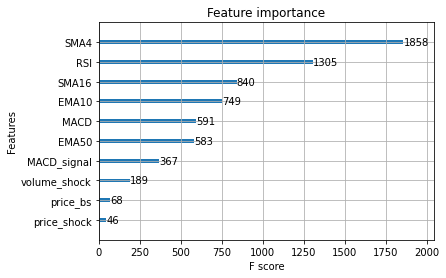

In [125]:
plot_importance(model)

In [126]:
y_pred_n500 = model.predict(x_valid_n500)
mse = mean_squared_error(y_valid_n500, y_pred_n500)
print('Mean squared error :',mse)
print('Root mean squared error : ', math.sqrt(mse))

Mean squared error : 4819.849047130556
Root mean squared error :  69.42513267636264


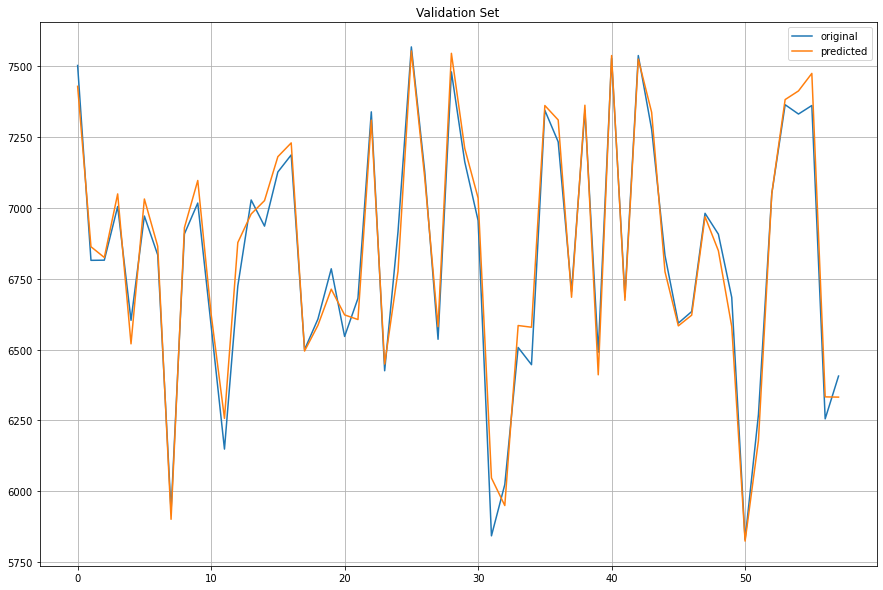

In [127]:
plt.figure(figsize=[15,10])
plt.grid(True)
ax = range(len(y_valid_n500))
plt.plot(ax, y_valid_n500, label="original")
plt.plot(ax, y_pred_n500, label="predicted")
plt.title("Validation Set")
plt.legend()
plt.show()

### K-Fold

In [128]:
# K-Fold
kfold = KFold(n_splits=3, shuffle=True)
kf_cv_scores = cross_val_score(model, x_train_n500, y_train_n500, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.95


In [129]:
y_pred_n500 = model.predict(x_test_n500)
mse = mean_squared_error(y_test_n500, y_pred_n500)
print('Mean squared error :',mse)
print('Root mean squared error : ', math.sqrt(mse))

Mean squared error : 5979.683979449267
Root mean squared error :  77.32841637748227


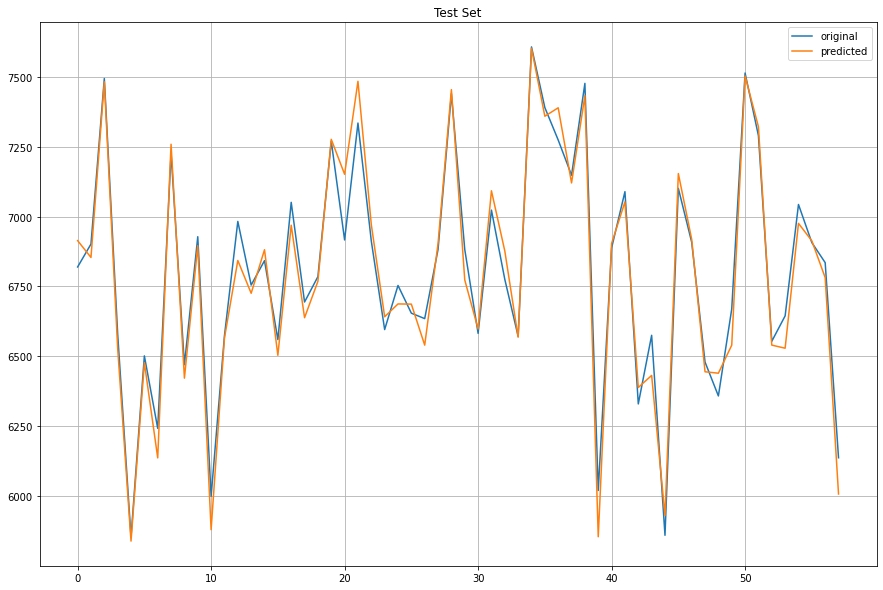

In [130]:
plt.figure(figsize=[15,10])
plt.grid(True)
ax = range(len(y_test_n500))
plt.plot(ax, y_test_n500, label="original")
plt.plot(ax, y_pred_n500, label="predicted")
plt.title("Test Set")
plt.legend()
plt.show()

In [131]:
# End